In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
mn=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mn.load_data()

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_train= X_train.reshape(60000,784) 
X_test = X_test.reshape(10000,784) 

In [8]:
X_train= X_train.astype('float32')
X_test = X_test.astype('float32') 

In [9]:
X_train=X_train/255
X_test =X_test/255

In [10]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

In [11]:
n=32
input_img=Input(shape=(784,))
encoded=Dense(n,activation='relu')(input_img)
decoded=Dense(784,activation='sigmoid')(encoded)
autoencoder=Model(input_img,decoded)

In [12]:
#encoder
encoder=Model(input_img,encoded)

In [13]:
#decoder
encoded_input =Input(shape=(n,))
decoder_layer =autoencoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))

In [14]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [15]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
trained_model1=autoencoder.fit(X_train,X_train,batch_size=128,epochs=10,validation_data=(X_test,X_test))

Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2233 - accuracy: 0.0116 - val_loss: 0.1562 - val_accuracy: 0.0151
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1411 - accuracy: 0.0104 - val_loss: 0.1261 - val_accuracy: 0.0117
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1185 - accuracy: 0.0127 - val_loss: 0.1101 - val_accuracy: 0.0122
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1069 - accuracy: 0.0133 - val_loss: 0.1017 - val_accuracy: 0.0131
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1005 - accuracy: 0.0139 - val_loss: 0.0973 - val_accuracy: 0.0121
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0973 - accuracy: 0.0131 - val_loss: 0.0949 - val_accuracy: 0.0121
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0958 - accuracy: 0.0130 - val_loss: 0.0940 - val_accuracy: 0.0144

In [17]:
test_loss,test_acc=autoencoder.evaluate(X_test,X_test)
print('Test accuracy:',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0929 - accuracy: 0.0138
Test accuracy: 0.013799999840557575


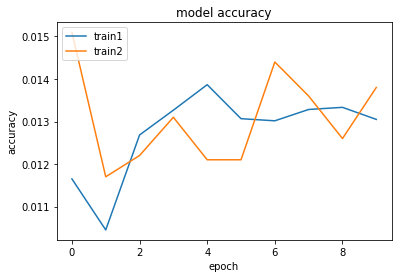

In [18]:
plt.plot(trained_model1.history['accuracy'])
plt.plot(trained_model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train1','train2'],loc='upper left')
plt.show()

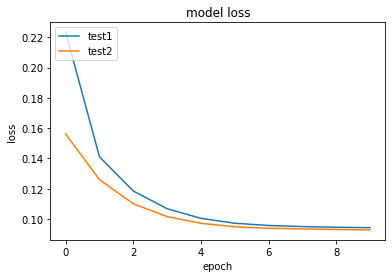

In [19]:
plt.plot(trained_model1.history['loss'])
plt.plot(trained_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test1','test2'],loc='upper left')
plt.show()

In [20]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

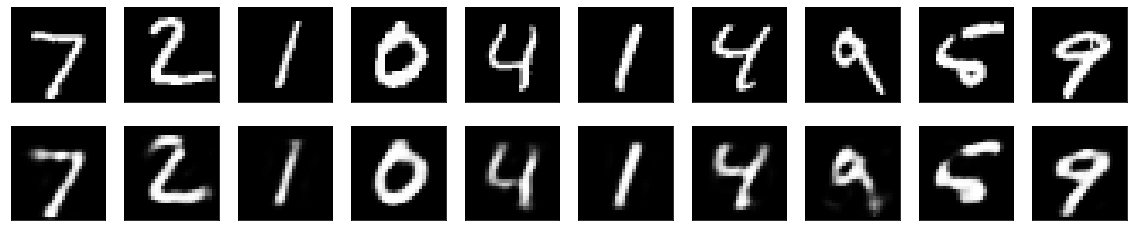

In [21]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()